In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 20
n = 10_000

optimizer_list = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNARiccati(),
    WASNARiccati(),
    USNA(c_nu=5.0),
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

optimizer_list_without_riccati = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNA(),
    WASNA(),
    USNA(c_nu=5.0),
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

In [3]:
N = 10

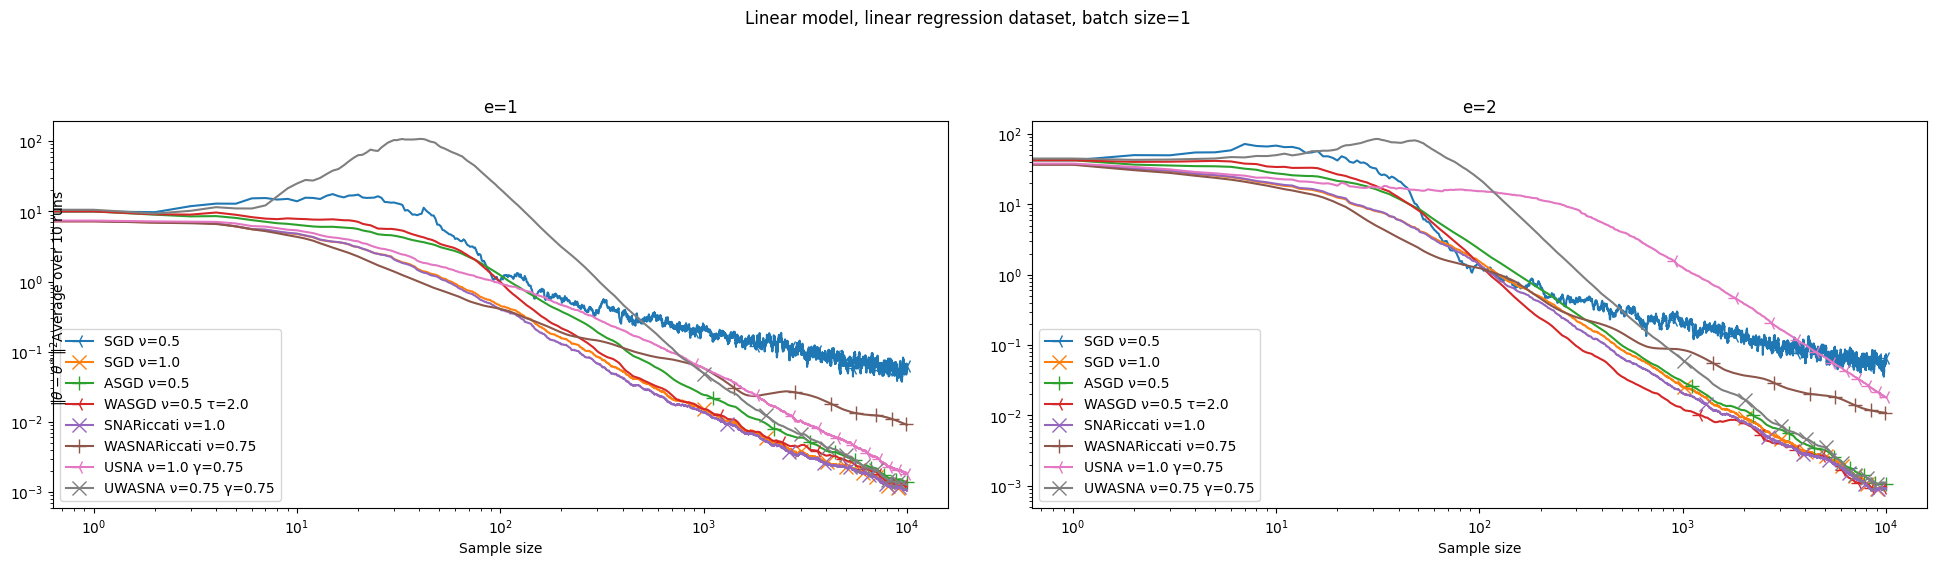

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

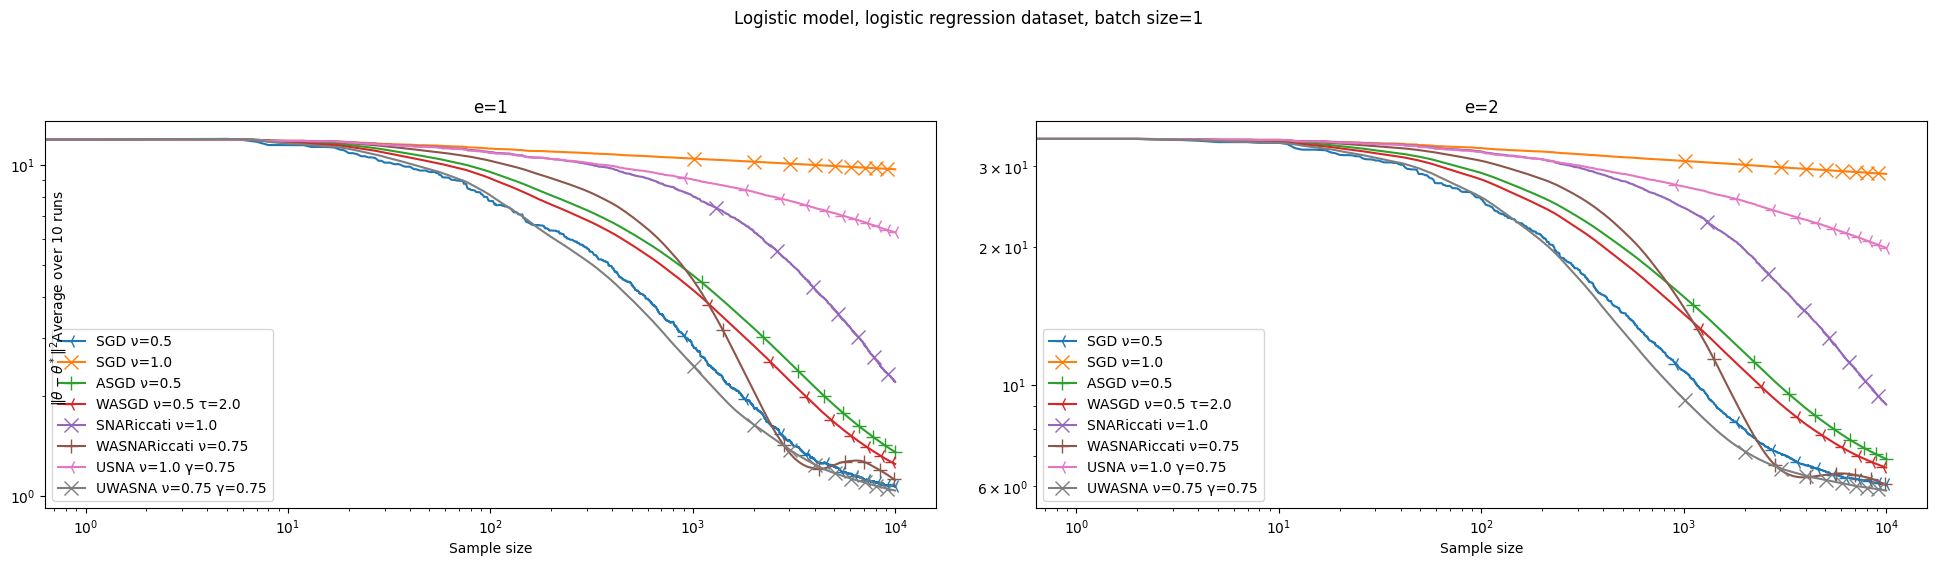

In [5]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

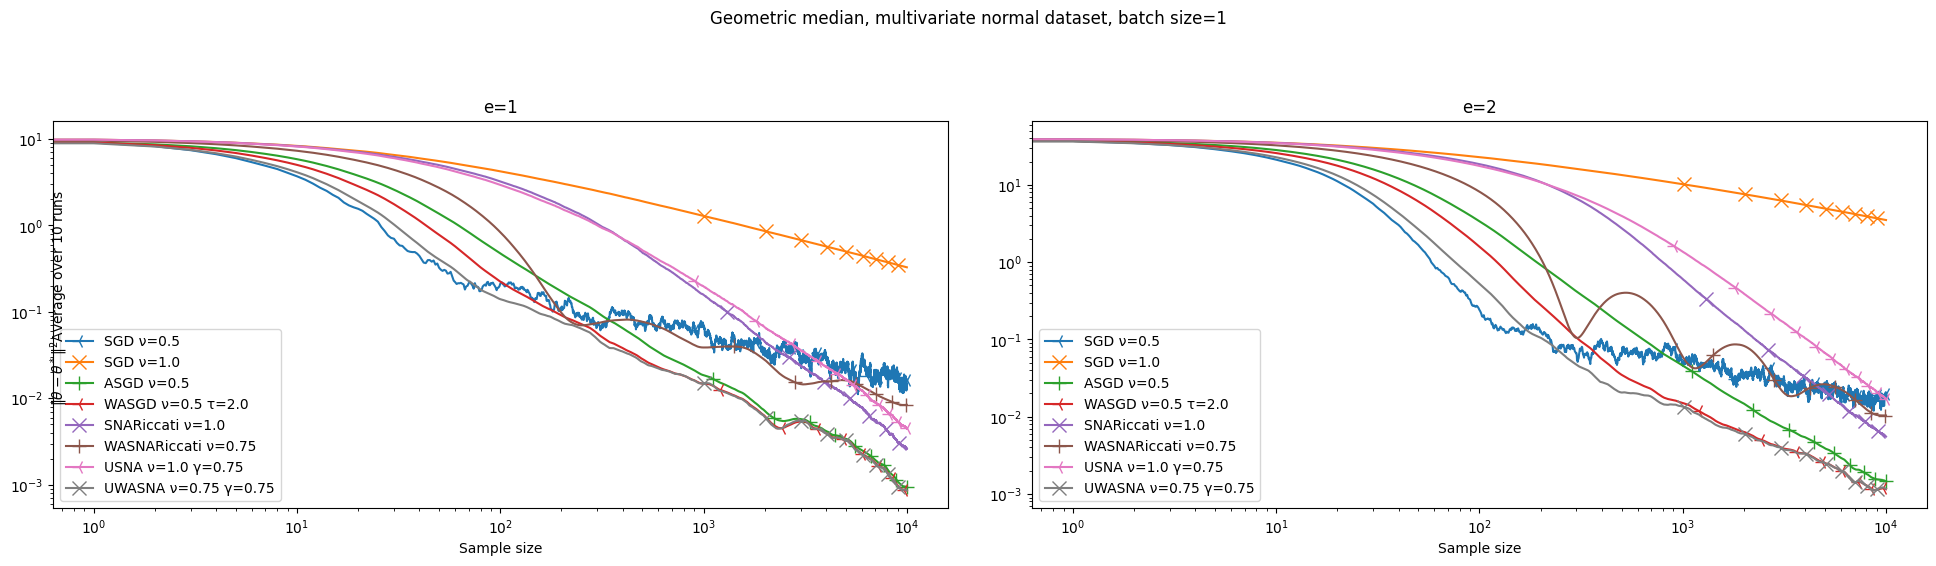

In [6]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

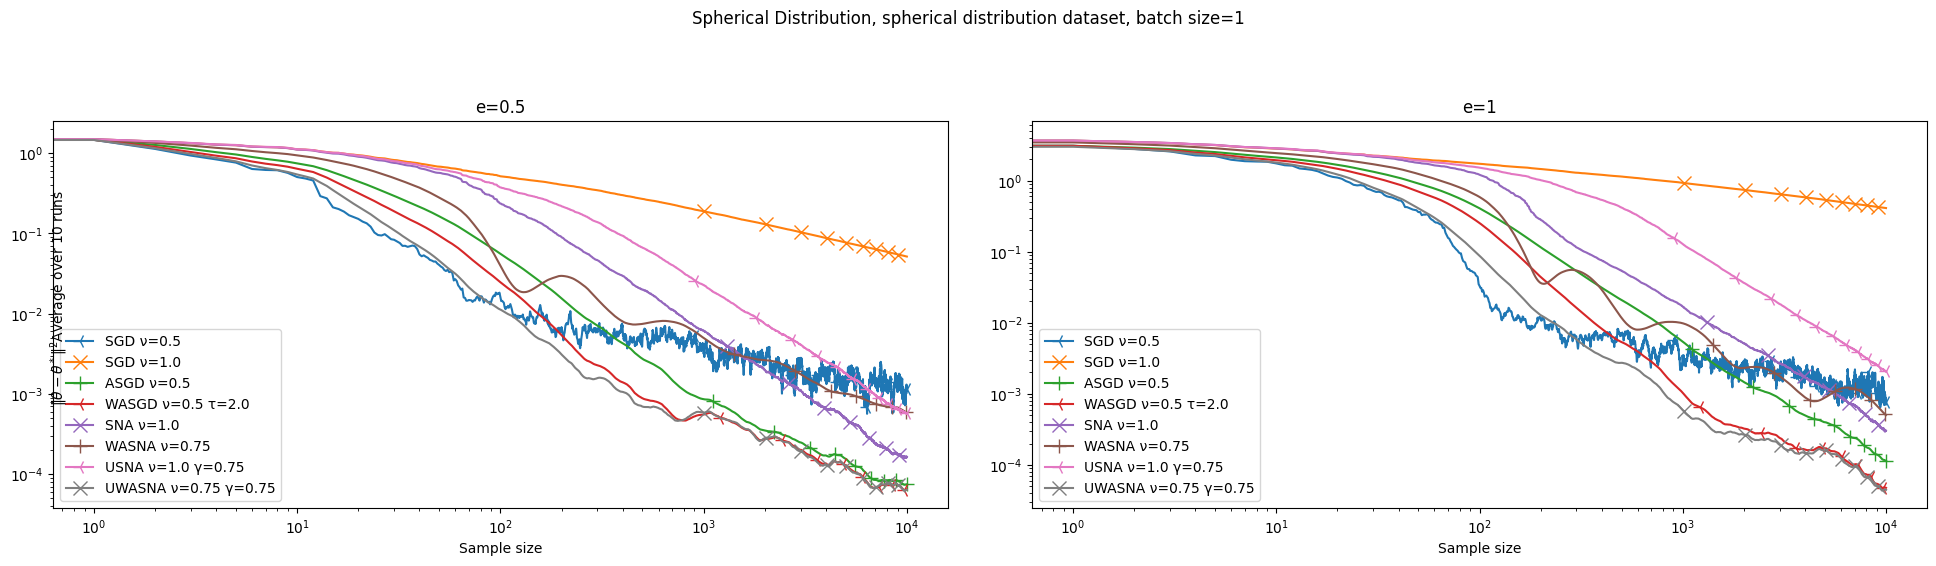

In [7]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_datasets(N=N, n=n)

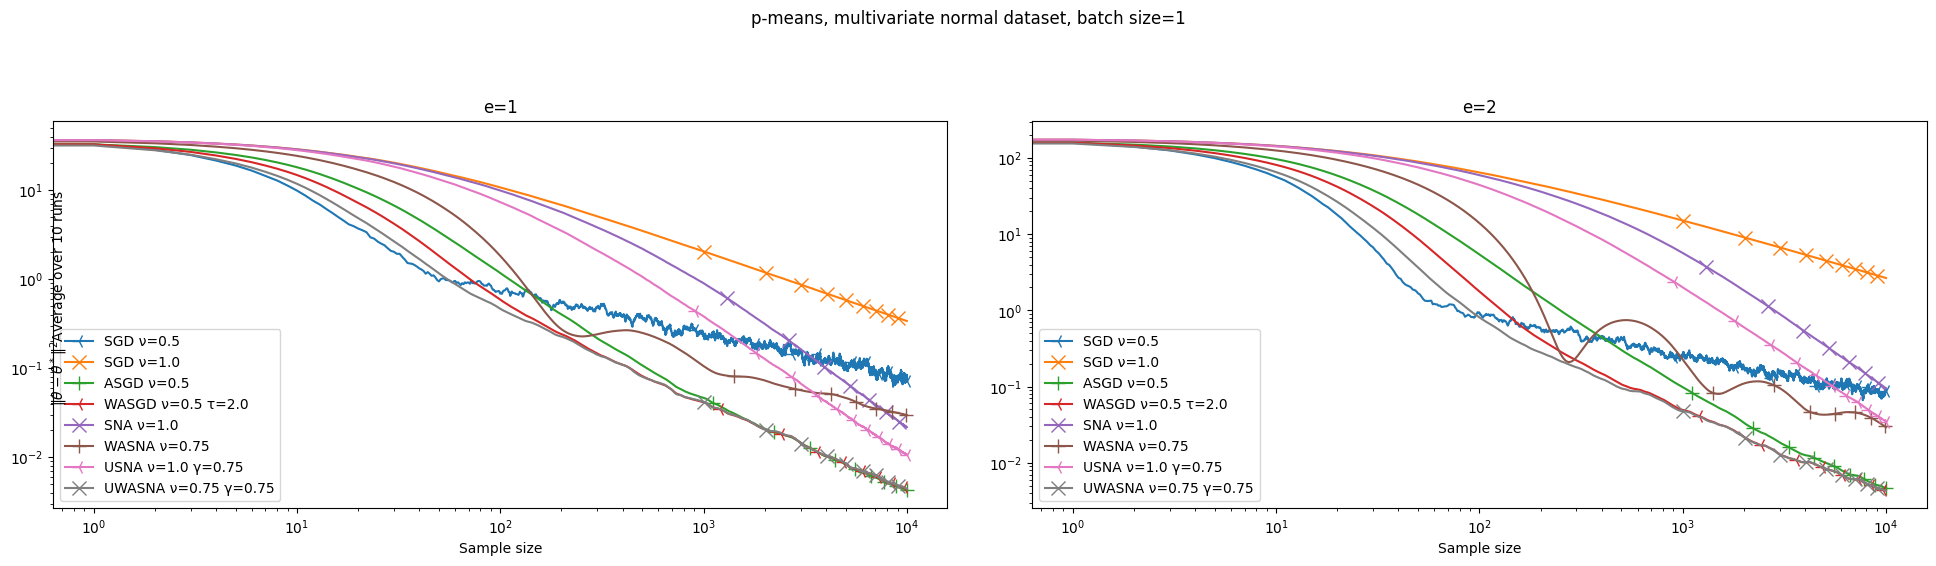

In [8]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

In [9]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

Optimizers:   0%|          | 0/8 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,SGD ν=0.5,SGD ν=1.0,ASGD ν=0.5,WASGD ν=0.5 τ=2.0,SNARiccati ν=1.0,WASNARiccati ν=0.75,USNA ν=1.0 γ=0.75,UWASNA ν=0.75 γ=0.75
Training Accuracy,70.590000,72.090000,72.450000,72.710000,76.520000,69.870000,63.580000,72.670000
Test Accuracy,70.710000,72.220000,72.590000,72.880000,76.650000,70.010000,63.380000,72.840000
